In [1]:
import cv2
import requests
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
!ls data/test-jpg/ | head -5

file_0.jpg
file_10000.jpg
file_10001.jpg
file_10002.jpg
file_10003.jpg
ls: write error: Broken pipe


In [3]:
host = '127.0.0.1'
port = '8000'
prefix = 'v1/pytorch_api'
route = 'classify'

URL = f'http://{host}:{port}/{prefix}/{route}'
headers = {'content-type': 'image/jpeg'}
URL

'http://127.0.0.1:8000/v1/pytorch_api/classify'

In [33]:
def classify_api(img_path):
    with open(img_path, 'rb') as f:
        img = f.read()
        r = requests.post(URL, data=img, headers=headers)
        
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        return img, r.json()
    
def show(img, label):
    plt.title(label)
    plt.axis('off')
    plt.imshow(img)

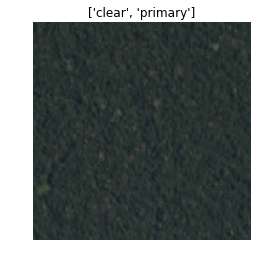

In [39]:
show(*classify_api('data/test-jpg/file_0.jpg'))

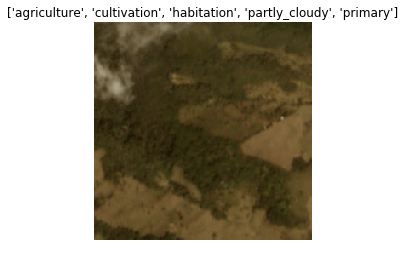

In [40]:
show(*classify_api('data/test-jpg/file_1.jpg'))

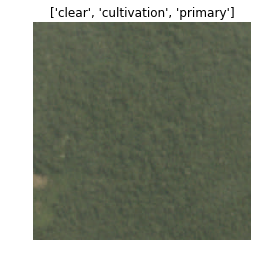

In [41]:
show(*classify_api('data/test-jpg/file_2.jpg'))